In [86]:
#Bibliotecas importadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Subindo base de dados para análise
dados = pd.read_csv("Dados.csv")

dados.shape

(46, 2)

In [87]:
#Convertendo o tipo de dado Data para datetime 
dados["Data"] = pd.to_datetime(dados["Data"])

In [88]:
#Função para geração de gráficos padronizados
def plotar(titulo, labelx, labely, x, y, dataset) :
    sns.set_palette("Accent")
    sns.set_style("darkgrid")
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, fontsize=18, loc="left")
    ax.set_xlabel(labelx, fontsize=12)
    ax.set_ylabel(labely, fontsize=12)
    ax = ax

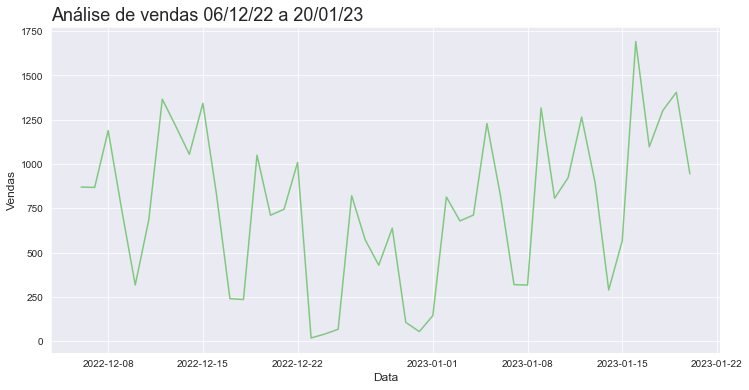

In [89]:
#Gráfico de análise de vendas
plotar("Análise de vendas 06/12/22 a 20/01/23", "Data", "Vendas", "Data", "Vendas", dados)

In [111]:
#Calculando média movel no período de 5 dias
dados["media_movel"] = dados["Vendas"].rolling(5).mean()
dados

,Data,Vendas,media_movel
0,2022-12-06,870,NaN
1,2022-12-07,868,NaN
2,2022-12-08,1189,NaN
3,2022-12-09,742,NaN
4,2022-12-10,317,797.2
5,2022-12-11,685,760.2
6,2022-12-12,1366,859.8
7,2022-12-13,1213,864.6
8,2022-12-14,1055,927.2
9,2022-12-15,1343,1132.4


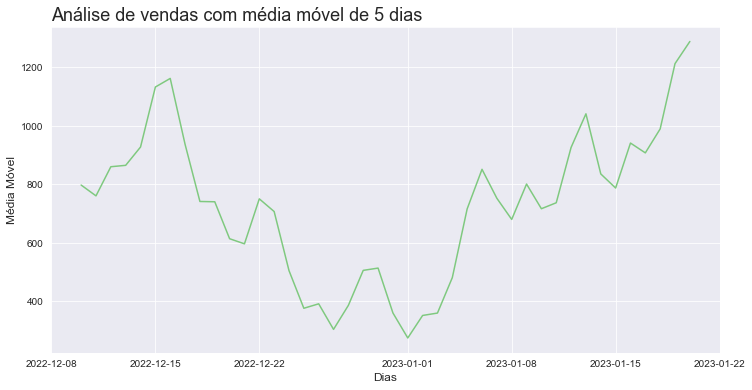

In [91]:
#Gráfico de análise de vendas com média móvel de 5 dias
plotar("Análise de vendas com média móvel de 5 dias", "Dias", "Média Móvel", "Data", "media_movel", dados)

In [109]:
#Cálculo da previsão de vendas para os próximos 5 dias, com base na média móvel

venda_projetada210123 = dados["media_movel"][45]
print("A previsão de vendas para o dia 21/01/23 é:",venda_projetada210123)

venda_projetada220123 = (venda_projetada210123 + dados["Vendas"][45] + dados["Vendas"][44] + dados["Vendas"][43] + dados["Vendas"][42]) / 5
print("A previsão de vendas para o dia 22/01/23 é:",venda_projetada220123.round(2))

venda_projetada230123 = (venda_projetada220123 + venda_projetada210123 + dados["Vendas"][45] + dados["Vendas"][44] + dados["Vendas"][43]) / 5
print("A previsão de vendas para o dia 23/01/23 é:",venda_projetada230123.round(2))

venda_projetada240123 = (venda_projetada230123 + venda_projetada220123 + venda_projetada210123 + dados["Vendas"][45] + dados["Vendas"][44]) / 5
print("A previsão de vendas para o dia 24/01/23 é:",venda_projetada240123.round(2))

venda_projetada250123 = (venda_projetada240123 +venda_projetada230123 + venda_projetada220123 + venda_projetada210123 + dados["Vendas"][45]) / 5
print("A previsão de vendas para o dia 25/01/23 é:",venda_projetada250123.round(2))

venda_projetada21a250123 = venda_projetada250123 + venda_projetada240123 +venda_projetada230123 + venda_projetada220123 + venda_projetada210123
print("A previsão de vendas totais para os próximos 5 dias é:",venda_projetada21a250123.round(2))

A previsão de vendas para o dia 21/01/23 é: 1288.2
A previsão de vendas para o dia 22/01/23 é: 1207.44
A previsão de vendas para o dia 23/01/23 é: 1229.53
A previsão de vendas para o dia 24/01/23 é: 1215.03
A previsão de vendas para o dia 25/01/23 é: 1177.04
A previsão de vendas totais para os próximos 5 dias é: 6117.24
